**About the Data**

- age: age of primary beneficiary
- sex: gender
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the 
ratio of height to weight, ideally 18.5 to 24.9
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance

In [ ]:
###https://www.kaggle.com/code/hely333/eda-regression

In [26]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt


df = pd.read_csv('/Users/annaking/Documents/Github/Files/Python-Fundamentals-/Pandas/Kaggle Practice/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [23]:
#check data 
print(df.info())
print('\n')
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [20]:
print(f'rows: {df.shape[0]}')
print(f'columns: {df.shape[1]}')


rows: 1338
columns: 7
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [9]:
##get some summary stats
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


##### Data Cleaning 

In [63]:
### enconde categorial data 
from sklearn.preprocessing import LabelEncoder

##sex 
#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates())  ##dropping duplicate
df.sex = le.transform(df.sex)

# smoker or not
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)

#region
le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [71]:
### Looking at Outliers 

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

df_check = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape[0] - df_check.shape[0] ##number of rows of outliers 

age            24.000000
sex             1.000000
bmi             8.397500
children        2.000000
smoker          0.000000
region          1.000000
charges     11899.625365
dtype: float64


283

1636

##### Plotting for Exploration

[]

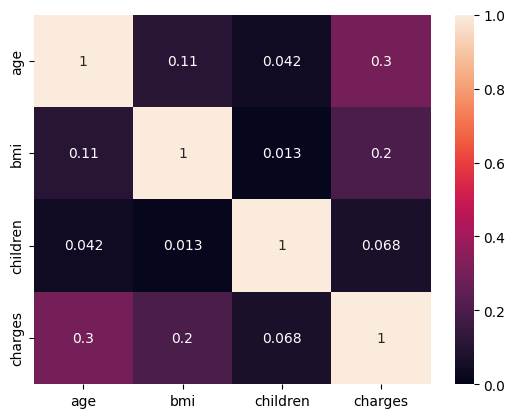

In [64]:
##looking at correlaitons across continuous variables 
# df_cont = df[['age', 'bmi', 'children', 'charges']]
heatmap = sns.heatmap(df_cont.corr(), vmin=0, vmax=1, annot=True)
plt.plot()

[]

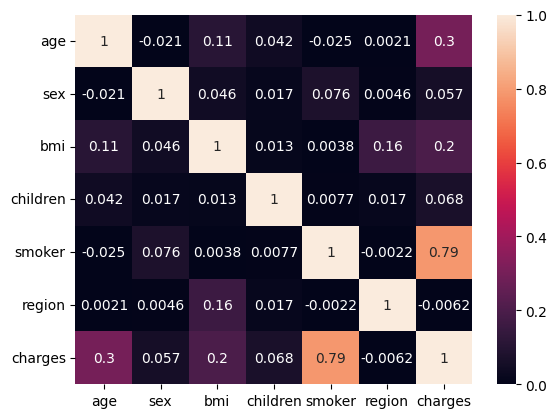

In [66]:
##looking at correlaitons across all variables 
heatmap = sns.heatmap(df.corr(), vmin=0, vmax=1, annot=True)
plt.plot()

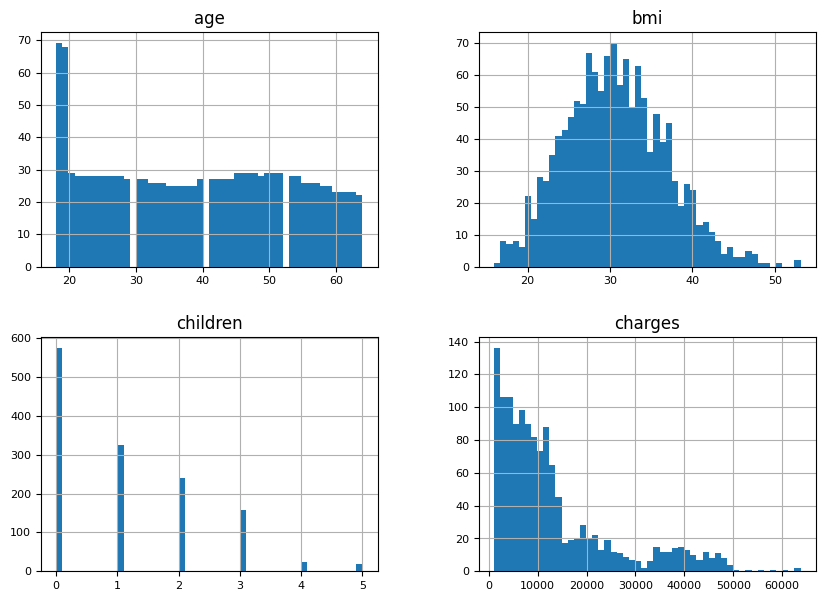

In [31]:
df.hist(figsize=(10, 7), bins=50, xlabelsize=8, ylabelsize=8); ## checking distributions 

<Figure size 2000x700 with 0 Axes>

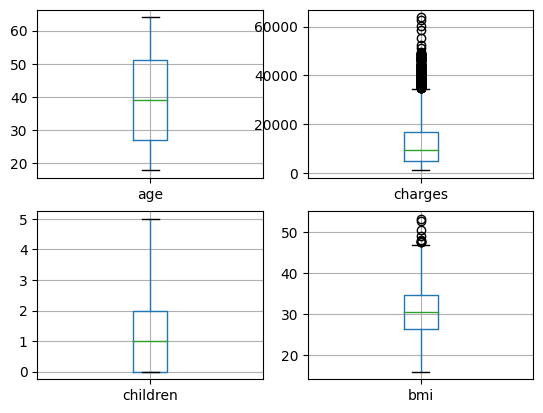

In [47]:
##https://katrintirok.github.io/python-environmental-lesson/06-visualization-matplotlib/index.html
# ##fig = plt.figure(figsize=(20, 7))

fig, axes = plt.subplots(2 , 2) # create 2x2 array of subplots

df.boxplot(column='age', ax=axes[0,0]) # add boxplot to 1st subplot
df.boxplot(column='charges', ax=axes[0,1]) # add boxplot to 2nd subplot
df.boxplot(column='children', ax=axes[1,0]) # add boxplot to 2nd subplot
df.boxplot(column='bmi', ax=axes[1,1]) # add boxplot to 2nd subplot

plt.show()

##### Plotting Charges / Smokers

/var/folders/vv/15vmsdzj0d9c0x2z42fx60fr0000gn/T/ipykernel_28915/1912537470.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.smoker == 1)]["charges"],color='c',ax=ax)
/Users/annaking/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/annaking/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

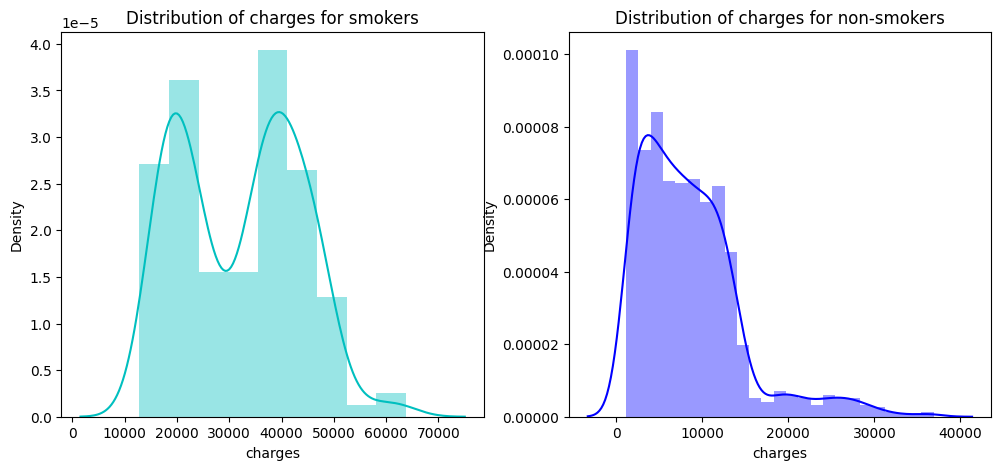

In [88]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(df[(df.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

In [ ]:
## Smoking patients spend more on treatment. But there is a feeling that the number of non-smoking patients is greater. Going to check it.

/Users/annaking/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/annaking/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/annaking/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/annaking/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

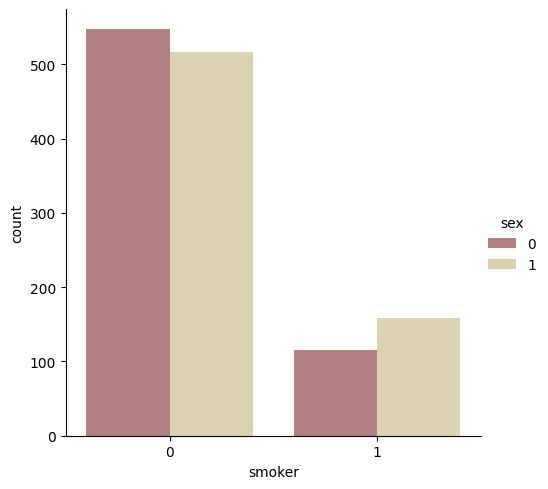

In [90]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=df)
